# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [ ]:
# Details Student 1:
# Yarin Cohen
# ID: 211361720

# Details Student 2:
# Amit Shiber
# ID: 322372582

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [39]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier, LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [2]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [3]:
# word net installation:

# unmark if you want to use and need to install
!pip install wn
!python -m wn download omw-he:1.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 681.9 kB/s eta 0:00:00a 0:00:01
Download [##############################] (315276/315276 bytes) Completeg
Read [##############################] (29690/29690) 000gn/T/tmp5jfh3sn6/omw-he/omw-he.xmll
Added omw-he:1.4 (Hebrew Wordnet)####] (29687/29687) Examplesonsionssours



In [5]:
# word net import:

# unmark if you want to use:
import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [6]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
!pip install hebrew_tokenizer

  Preparing metadata (setup.py) ... done
  Created wheel for hebrew_tokenizer: filename=hebrew_tokenizer-2.3.0-py3-none-any.whl size=13418 sha256=060dbd3123f4127a18937ff8d31cddc989fe64b4f195d8232fdccd85302a7f8c
  Stored in directory: /Users/yarinco123/Library/Caches/pip/wheels/a7/2f/af/95d5eb2e7c291753542d4419e200429a22fb2d74e3f27d7711
Successfully built hebrew_tokenizer


In [7]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht

/Users/yarinco123/Downloads/assignment3-text_analysis


### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [8]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [9]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [10]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

In [33]:
# YOUR CODE HERE

# Divide the text into words:

def custom_tokenizer(text):
    punctuation_chars = "!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"
    clean_text = ""

    for char in text:
        if char not in punctuation_chars and not char.isdigit():
            clean_text += char

    text = clean_text
    tokens = ht.tokenize(text)
    return [str(tuple[1]) for tuple in tokens]

In [34]:
custom_tokenizer("אתמול הלכתי, 7 ברחוב")

['אתמול', 'הלכתי', 'ברחוב']

In [30]:
# YOUR CODE HERE
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
X = df_train.story
y = df_train.gender

In [32]:
# Add as many code cells as you need
# YOUR CODE HERE

f1_scorer = make_scorer(f1_score, greater_is_better=True, average='macro')

vectorizers = [
    (CountVectorizer, {'min_df': [0, 0.05, 0.1], 'max_df': [0.5, 0.7,0.95], 'ngram_range': [(1, 1), (2, 4)]}),
    (TfidfVectorizer, {'min_df': [0, 0.05, 0.1], 'max_df': [0.5, 0.7,0.95], 'ngram_range': [(1, 1), (2, 4)]}),
]


kf = KFold(n_splits=5, shuffle=True, random_state=42)
lr = LogisticRegression(max_iter=1000)

for VectorizerClass, vectorizer_params in vectorizers:
    for min_df in vectorizer_params['min_df']:
        for max_df in vectorizer_params['max_df']:
            for ngram_range in vectorizer_params['ngram_range']:
                vec = VectorizerClass(min_df=min_df, max_df=max_df, ngram_range=ngram_range, tokenizer=custom_tokenizer)
                X_transformed = vec.fit_transform(X)
                lr_scores = cross_val_score(lr, X_transformed, y, cv=kf, scoring=f1_scorer)
                mean_score = np.mean(lr_scores)


Once the preprocessing models are selected, the text data undergoes transformation into numerical features using a TfidfVectorizer. The outcome is a sparse matrix that gets converted into a pandas DataFrame. From the initial training data, two separate DataFrames are created. In one DataFrame, the gender column is encoded with binary labels where '1' represents females, while in another DataFrame, '1' denotes males.

In [35]:
vec = TfidfVectorizer(max_df=0.95, min_df=0, ngram_range=(1, 2), max_features=40000, tokenizer=custom_tokenizer)
X_train = vec.fit_transform(df_train["story"])
X_train_CV = pd.DataFrame(X_train.toarray(), columns=vec.get_feature_names_out())

# splitting the data
X_train_CV["gender"] = df_train["gender"]
X_train_male = X_train_CV.copy()
X_train_female = X_train_CV.copy()

X_train_male["gender"] = np.where(X_train_male["gender"] == 'f',0,1)
X_train_female["gender"] = np.where(X_train_female["gender"] == 'f',1,0)

target_columns = X_train_CV.columns[X_train_CV.columns != "gender"]
X_male = X_train_male[target_columns]
X_female = X_train_female[target_columns]

y_male = X_train_male["gender"]
y_female = X_train_female["gender"]

### Model #1 - Linear Regression

Logistic Regression serves as a machine learning algorithm utilized in binary classification tasks, aiming to foresee one out of two potential outcomes. This model computes the probability of an input being associated with either of the two classes through a logistic function. Subsequently, the input is allocated to the class possessing the greater probability.

In [36]:
# LogisticRegression model
param_grid = {
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1.0, 10.0, 100.0],
        'solver': ['lbfgs', 'newton-cg', 'liblinear'],
        'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 3}, {0: 1, 1: 5}],
        'random_state': [41, 42]
}

# finding hyperparameters for male and best estimator for f1_score
lr = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(lr, param_grid, cv=kf, scoring=f1_scorer, verbose=3, n_jobs=-1)
grid_search.fit(X_male,y_male)
best_lr_male = grid_search.best_estimator_
f1_score_male = cross_val_score(best_lr_male, X_male,y_male, scoring = make_scorer(f1_score), cv=10).mean()

# finding hyperparameters for female and best estimator for f1_score
grid_search.fit(X_female,y_female)
best_lr_female = grid_search.best_estimator_
f1_score_female = cross_val_score(best_lr_female, X_female,y_female, scoring = make_scorer(f1_score), cv=10).mean()

f1_avarage = (f1_score_male + f1_score_female)/2

print("f1 male: ", f1_score_male)
print("f1 female: ", f1_score_female)
print("f1 average: ", f1_avarage)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END C=0.01, class_weight={0: 1, 1: 1}, penalty=l1, random_state=41, solver=lbfgs;, score=nan total time=   0.2s
[CV 2/5] END C=0.01, class_weight={0: 1, 1: 1}, penalty=l1, random_state=41, solver=lbfgs;, score=nan total time=   0.2s
[CV 4/5] END C=0.01, class_weight={0: 1, 1: 1}, penalty=l1, random_state=41, solver=lbfgs;, score=nan total time=   0.2s
[CV 3/5] END C=0.01, class_weight={0: 1, 1: 1}, penalty=l1, random_state=41, solver=lbfgs;, score=nan total time=   0.2s
[CV 1/5] END C=0.01, class_weight={0: 1, 1: 1}, penalty=l1, random_state=41, solver=newton-cg;, score=nan total time=   0.2s
[CV 5/5] END C=0.01, class_weight={0: 1, 1: 1}, penalty=l1, random_state=41, solver=lbfgs;, score=nan total time=   0.2s
[CV 2/5] END C=0.01, class_weight={0: 1, 1: 1}, penalty=l1, random_state=41, solver=newton-cg;, score=nan total time=   0.2s
[CV 3/5] END C=0.01, class_weight={0: 1, 1: 1}, penalty=l1, random_state=41, solve

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 3},
                                          {0: 1, 1: 5}],
                         'penalty': ['l1', 'l2'], 'random_state': [41, 42],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear']},
             scoring=make_scorer(f1_score, average=macro), verbose=3)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END C=0.01, class_weight={0: 1, 1: 1}, penalty=l1, random_state=41, solver=lbfgs;, score=nan total time=   0.2s
[CV 3/5] END C=0.01, class_weight={0: 1, 1: 1}, penalty=l1, random_state=41, solver=lbfgs;, score=nan total time=   0.2s
[CV 2/5] END C=0.01, class_weight={0: 1, 1: 1}, penalty=l1, random_state=41, solver=lbfgs;, score=nan total time=   0.2s
[CV 4/5] END C=0.01, class_weight={0: 1, 1: 1}, penalty=l1, random_state=41, solver=lbfgs;, score=nan total time=   0.2s
[CV 1/5] END C=0.01, class_weight={0: 1, 1: 1}, penalty=l1, random_state=41, solver=newton-cg;, score=nan total time=   0.2s
[CV 5/5] END C=0.01, class_weight={0: 1, 1: 1}, penalty=l1, random_state=41, solver=lbfgs;, score=nan total time=   0.2s
[CV 2/5] END C=0.01, class_weight={0: 1, 1: 1}, penalty=l1, random_state=41, solver=newton-cg;, score=nan total time=   0.2s
[CV 3/5] END C=0.01, class_weight={0: 1, 1: 1}, penalty=l1, random_state=41, solve

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 3},
                                          {0: 1, 1: 5}],
                         'penalty': ['l1', 'l2'], 'random_state': [41, 42],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear']},
             scoring=make_scorer(f1_score, average=macro), verbose=3)

f1 male:  0.8876334595400446
f1 female:  0.592951895003545
f1 average:  0.7402926772717948


### Model #2 - SVC

The acronym SVC represents Support Vector Classification, which belongs to the category of supervised learning algorithms suitable for classification assignments. The primary objective of an SVC is to identify the optimal hyperplane that maximizes the margin – the gap between classes. This hyperplane acts as a decisive boundary that segregates data points into distinct classes. The core aim of an SVC is to identify the most extensive margin achievable.

In [40]:
# SVC model
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'degree': [2,4],
    'gamma': ['scale', 'auto']
}

# finding hyperparameters for male and best estimator for f1_score
svm = SVC(random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=kf, scoring=f1_scorer, verbose=3, n_jobs=-1)
grid_search.fit(X_male,y_male)
best_svm_male = grid_search.best_estimator_
f1_score_male = cross_val_score(best_svm_male, X_male,y_male, scoring =f1_scorer, cv=10).mean()

# finding hyperparameters for female and best estimator for f1_score
grid_search.fit(X_female,y_female)
best_svm_female = grid_search.best_estimator_
f1_score_female = cross_val_score(best_svm_female, X_female,y_female, scoring = f1_scorer, cv=10).mean()

f1_avarage = (f1_score_male + f1_score_female)/2

print("f1 male: ", f1_score_male)
print("f1 female: ", f1_score_female)
print("f1 average: ", f1_avarage)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 2/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.439 total time=  18.9s
[CV 5/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.442 total time=  19.4s
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.430 total time=  19.4s
[CV 4/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.434 total time=  19.5s
[CV 3/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.419 total time=  19.6s
[CV 3/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.419 total time=  20.9s
[CV 2/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.439 total time=  21.1s
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.430 total time=  21.2s
[CV 1/5] END C=0.1, degree=2, gamma=auto, kernel=poly;, score=0.430 total time=   9.9s
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=sigmoid;, score=0.430 total time=  17.5s
[CV 2/5] END C=0.1, degree=2, gamma=scale, kernel=sigmoid;,

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring=make_scorer(f1_score, average=macro), verbose=3)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 3/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.419 total time=  19.9s
[CV 4/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.434 total time=  20.0s
[CV 5/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.442 total time=  20.0s
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.430 total time=  20.1s
[CV 2/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.439 total time=  20.1s
[CV 3/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.419 total time=  21.6s
[CV 2/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.439 total time=  21.7s
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.430 total time=  21.7s
[CV 1/5] END C=0.1, degree=2, gamma=auto, kernel=poly;, score=0.430 total time=  10.1s
[CV 2/5] END C=0.1, degree=2, gamma=scale, kernel=sigmoid;, score=0.439 total time=  18.2s
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=sigmoid;,

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring=make_scorer(f1_score, average=macro), verbose=3)

f1 male:  0.6399543040965179
f1 female:  0.6399543040965179
f1 average:  0.6399543040965179


### Model #3 - Naive Base

Multinomial Naive Bayes stands as a variant of the Naive Bayes algorithm, tailored for classification undertakings, with a focus on text categorization. Operating as a probabilistic model, it draws from Bayes' theorem, a foundational concept that outlines the likelihood of an event considering pre-existing information about potentially correlated circumstances.

In [37]:
#Naive Base model
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
    'fit_prior': [True, False],
    'class_prior': [None, [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5], [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]
}

# finding hyperparameters for male and best estimator for f1_score
nb = MultinomialNB()
grid_search = GridSearchCV(nb, param_grid, cv=kf, scoring=f1_scorer, verbose=3, n_jobs=-1)
grid_search.fit(X_male,y_male)
best_nb_male = grid_search.best_estimator_
f1_score_male = cross_val_score(best_nb_male, X_male,y_male, scoring = make_scorer(f1_score), cv=10).mean()

# finding hyperparameters for female and best estimator for f1_score
grid_search.fit(X_female,y_female)
best_nb_female = grid_search.best_estimator_
f1_score_female = cross_val_score(best_nb_female, X_female,y_female, scoring = make_scorer(f1_score), cv=10).mean()

f1_avarage = (f1_score_male + f1_score_female)/2

print("f1 male: ", f1_score_male)
print("f1 female: ", f1_score_female)
print("f1 average: ", f1_avarage)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 2/5] END alpha=0.01, class_prior=None, fit_prior=False;, score=0.686 total time=   0.6s
[CV 1/5] END alpha=0.01, class_prior=None, fit_prior=True;, score=0.684 total time=   0.7s
[CV 4/5] END alpha=0.01, class_prior=None, fit_prior=True;, score=0.646 total time=   0.7s
[CV 1/5] END alpha=0.01, class_prior=None, fit_prior=False;, score=0.709 total time=   0.7s
[CV 5/5] END alpha=0.01, class_prior=None, fit_prior=True;, score=0.641 total time=   0.7s
[CV 3/5] END alpha=0.01, class_prior=None, fit_prior=True;, score=0.605 total time=   0.7s
[CV 2/5] END alpha=0.01, class_prior=None, fit_prior=True;, score=0.628 total time=   0.7s
[CV 3/5] END alpha=0.01, class_prior=None, fit_prior=False;, score=0.672 total time=   0.7s
[CV 4/5] END alpha=0.01, class_prior=None, fit_prior=False;, score=0.667 total time=   0.6s
[CV 2/5] END alpha=0.01, class_prior=[0.2, 0.8], fit_prior=True;, score=0.615 total time=   0.6s
[CV 1/5] END alpha

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'class_prior': [None, [0.2, 0.8], [0.3, 0.7],
                                         [0.4, 0.6], [0.5, 0.5], [0.6, 0.4],
                                         [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]],
                         'fit_prior': [True, False]},
             scoring=make_scorer(f1_score, average=macro), verbose=3)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 3/5] END alpha=0.01, class_prior=None, fit_prior=False;, score=0.672 total time=   0.6s
[CV 5/5] END alpha=0.01, class_prior=None, fit_prior=True;, score=0.641 total time=   0.6s
[CV 4/5] END alpha=0.01, class_prior=None, fit_prior=True;, score=0.646 total time=   0.7s
[CV 3/5] END alpha=0.01, class_prior=None, fit_prior=True;, score=0.605 total time=   0.7s
[CV 1/5] END alpha=0.01, class_prior=None, fit_prior=True;, score=0.684 total time=   0.7s
[CV 1/5] END alpha=0.01, class_prior=None, fit_prior=False;, score=0.709 total time=   0.7s
[CV 2/5] END alpha=0.01, class_prior=None, fit_prior=False;, score=0.686 total time=   0.8s
[CV 2/5] END alpha=0.01, class_prior=None, fit_prior=True;, score=0.628 total time=   0.8s
[CV 4/5] END alpha=0.01, class_prior=None, fit_prior=False;, score=0.667 total time=   0.6s
[CV 1/5] END alpha=0.01, class_prior=[0.2, 0.8], fit_prior=True;, score=0.713 total time=   0.6s
[CV 5/5] END alpha

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'class_prior': [None, [0.2, 0.8], [0.3, 0.7],
                                         [0.4, 0.6], [0.5, 0.5], [0.6, 0.4],
                                         [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]],
                         'fit_prior': [True, False]},
             scoring=make_scorer(f1_score, average=macro), verbose=3)

f1 male:  0.8595085426993414
f1 female:  0.5627700455444358
f1 average:  0.7111392941218886


### So... What is the best model?

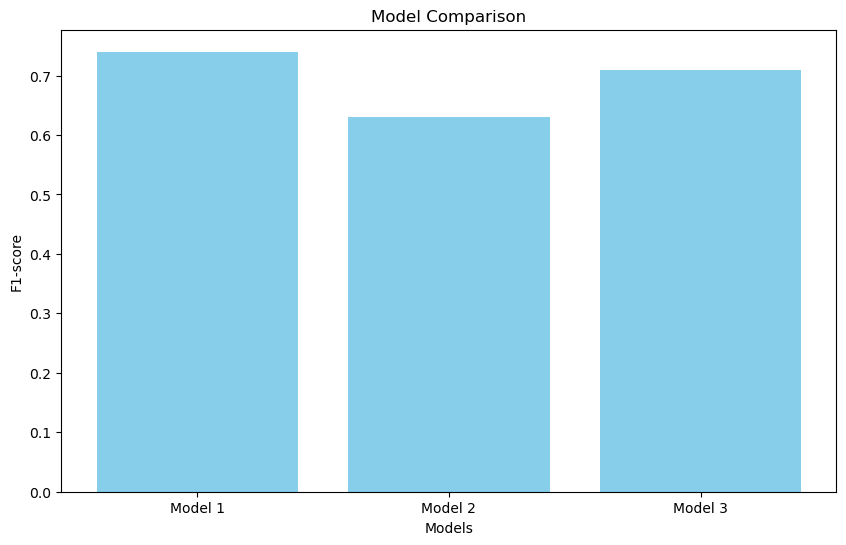

In [47]:

f1_scores = {
    'Model 1': 0.74,
    'Model 2': 0.63,
    'Model 3': 0.71
}

plt.figure(figsize=(10, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.title('Model Comparison')
plt.show();

#### Therefore, model 1 is better, with accuracy of 74%. We will choose the first one.

### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [ ]:
df_predicted.to_csv('classification_results.csv',index=False)